<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [85]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [86]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [87]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

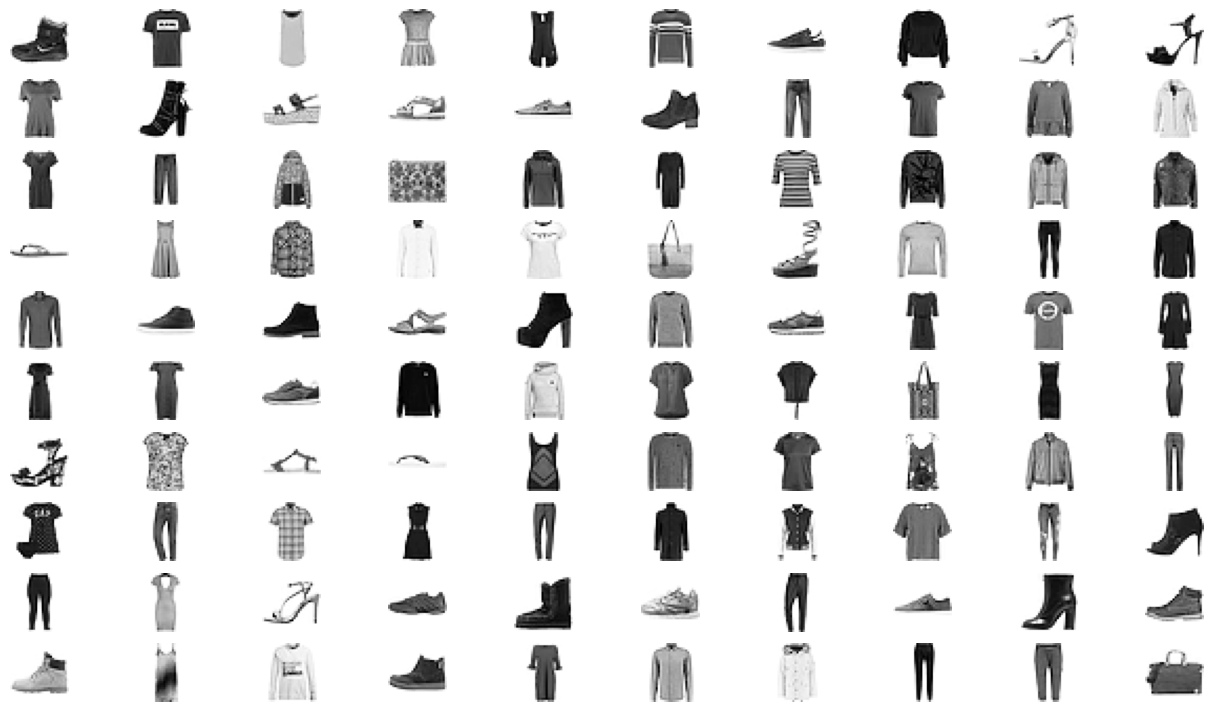

In [88]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

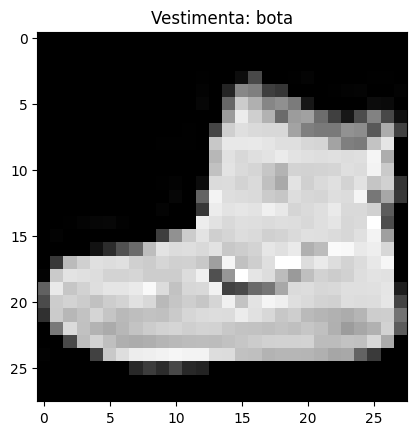

In [89]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

plt.imshow(data_X_train[0], cmap='gray')

plt.title("Vestimenta: " + category_list[data_y_train[0]])

plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [90]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)

print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [91]:
# Alumno: Normalizar los datos entre 0 y 1

X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [92]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)

print(" La cantidad de datos en observacion es :", X_train_norm.shape[0])

 La cantidad de datos en observacion es : 60000


In [93]:
# Alumno: Imprimir la dimension de la imagen
print("Tamaño de la 1ra imagen:", X_train_norm[0].shape)

Tamaño de la 1ra imagen: (28, 28)


In [94]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][width][height][pixels]

X_train = X_train_norm.reshape(data_X_train.shape[0], data_X_train.shape[1], data_X_train.shape[2], 1).astype('float32')
X_test = X_test_norm.reshape(data_X_test.shape[0], data_X_test.shape[1], data_X_test.shape[2], 1).astype('float32')
X_train.shape

(60000, 28, 28, 1)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

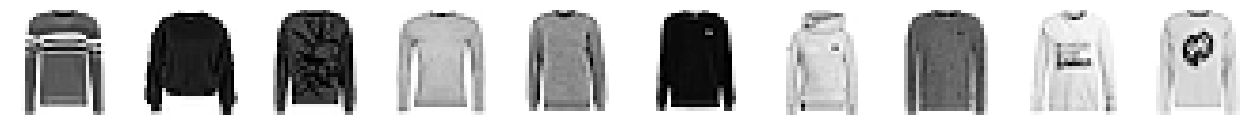

In [95]:
# Alumno: Explorar los primeros diez puloveres del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):

    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[j] == 2:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break         
        j += 1
plt.show()


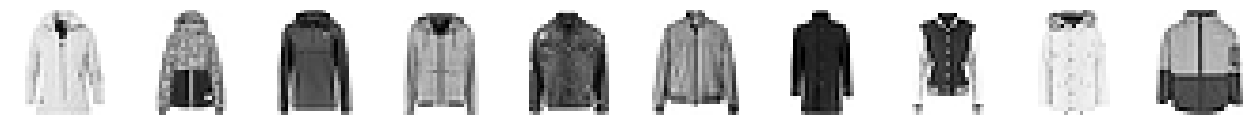

In [96]:
# Alumno: Explorar los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):

    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[j] == 4:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break         
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [97]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)


In [98]:
# input shape

in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [99]:
# output shape

out_shape = y_train.shape[1]
out_shape

10

In [100]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()

In [101]:
# Alumno: entrenar el modelo


model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 32)        

In [102]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.8061 - accuracy: 0.7081 - val_loss: 0.5064 - val_accuracy: 0.8107
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4973 - accuracy: 0.8171 - val_loss: 0.4197 - val_accuracy: 0.8467
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4275 - accuracy: 0.8454 - val_loss: 0.3799 - val_accuracy: 0.8593
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3877 - accuracy: 0.8567 - val_loss: 0.3686 - val_accuracy: 0.8637
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3621 - accuracy: 0.8654 - val_loss: 0.3608 - val_accuracy: 0.8685
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3457 - accuracy: 0.8733 - val_loss: 0.3231 - val_accuracy: 0.8798
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3288 - accuracy: 0.8799 - val_loss: 0.3236 - val_accuracy: 0.8790
Epoch 

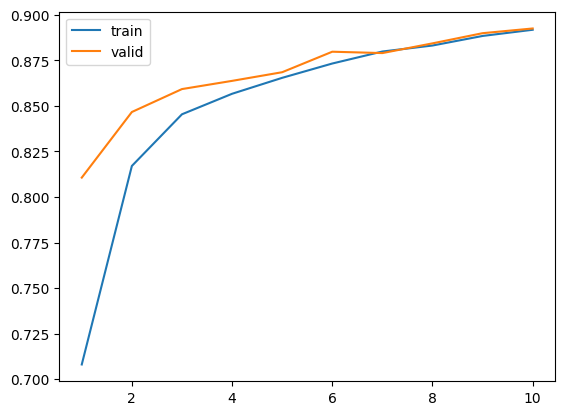

In [103]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [104]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[9.8443820e-08, 1.2818676e-06, 5.3323384e-07, 1.0334396e-06,
        4.7603503e-08, 6.6960477e-03, 1.2293391e-06, 8.0336286e-03,
        1.1076911e-05, 9.8525500e-01],
       [1.5327549e-03, 1.1456708e-07, 9.8009998e-01, 3.2890244e-07,
        1.4453545e-02, 6.3253625e-11, 3.9115469e-03, 2.4031525e-13,
        1.6456811e-06, 6.8530810e-12],
       [1.1929018e-07, 9.9999976e-01, 4.7287290e-09, 2.0581213e-08,
        9.8641557e-08, 2.2790878e-09, 1.3738027e-08, 1.0495231e-15,
        1.5334232e-09, 2.7283206e-12]], dtype=float32)

In [105]:
# Alumno: Transformar las probabilidades en y_hat usando argmax

y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [106]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.3058 - accuracy: 0.8886


0.8885999917984009

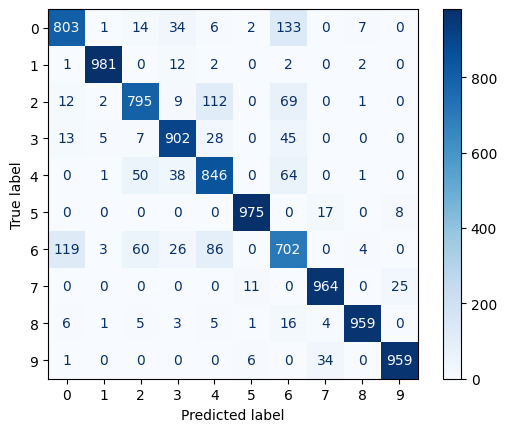

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [108]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [109]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_peores_sacos = X_test[rank_saco]

y_test_peores_sacos = y_test[rank_saco]

In [110]:
# Alumno: Calcular la exactitud de los sacos seleccionados

score = model.evaluate(X_test_peores_sacos, y_test_peores_sacos)
score[1]

1/1 [==============================] - 0s 28ms/step - loss: 1.0927 - accuracy: 0.5000


0.5

In [111]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_prob_peores_sacos = model.predict(X_test_peores_sacos)

y_hat_peores = np.argmax(y_hat_prob_peores_sacos,axis=1)

print(y_hat_peores)

1/1 [==============================] - 0s 21ms/step
[4 2 2 6 4 4 4 2 4 2]


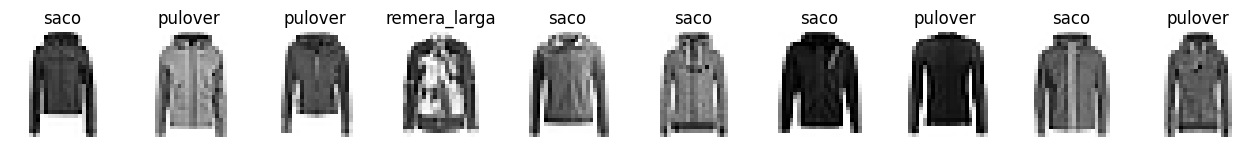

In [112]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
j = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    ax.set_title(category_list[y_hat_peores[j]])
    j += 1

plt.show()